In [105]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [106]:
iris= datasets.load_iris()

In [107]:
print(type(iris))

<class 'sklearn.utils._bunch.Bunch'>


In [108]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [109]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [110]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [111]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [112]:
df['target']=iris.target

In [113]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [114]:
dict_target_name={0:'setosa',1:'versicolor',2:'virginica'}

In [115]:
df['target_names']=df['target'].map(dict_target_name)

In [116]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   target_names       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [118]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Data visualization

In [119]:
  df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'target_names'],
      dtype='object')

In [120]:
df.shape

(150, 6)

In [121]:
#number of null values
df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
target,0
target_names,0


<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

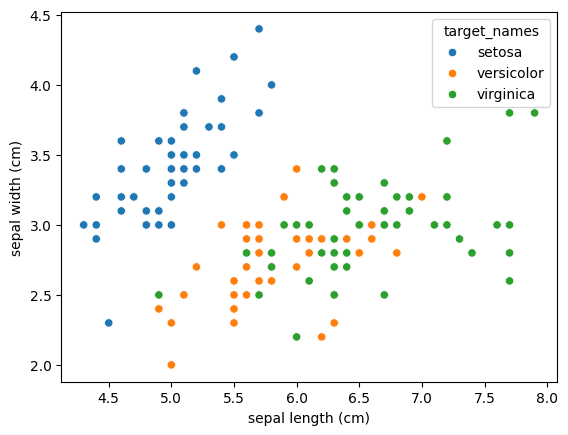

In [122]:
sns.scatterplot(data=df,x='sepal length (cm)',y='sepal width (cm)',hue='target_names')

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

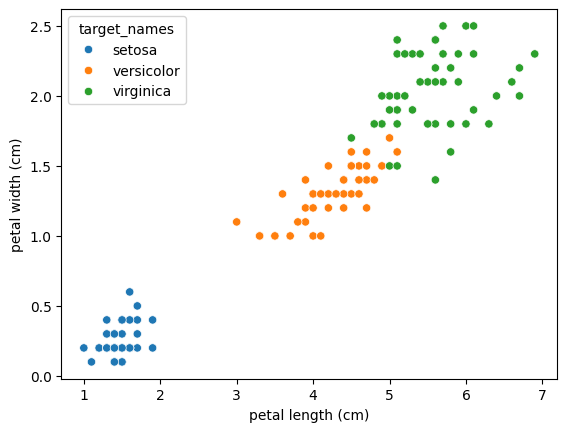

In [123]:
sns.scatterplot(data=df,x='petal length (cm)',y='petal width (cm)',hue='target_names')

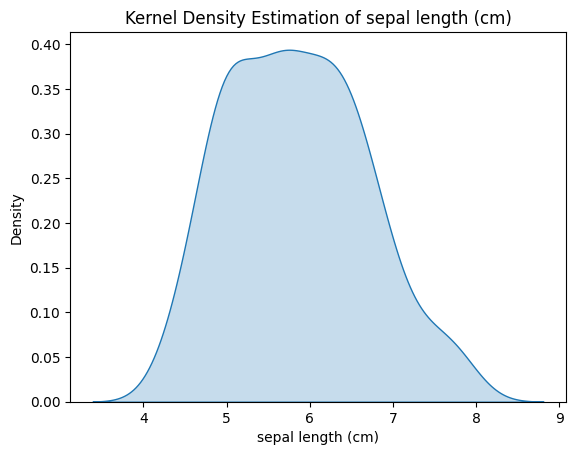

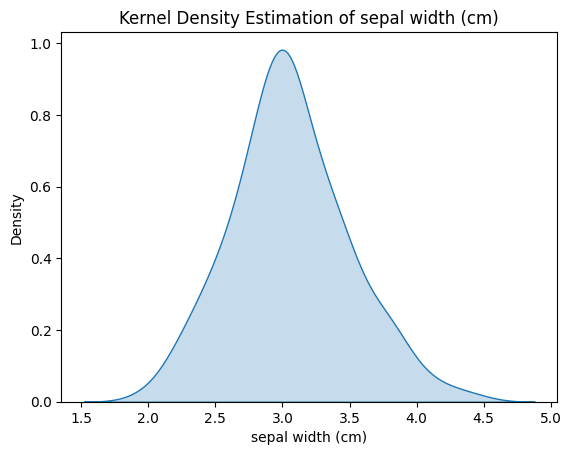

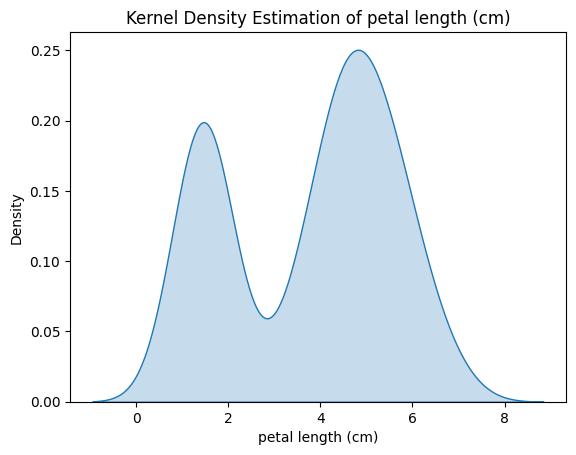

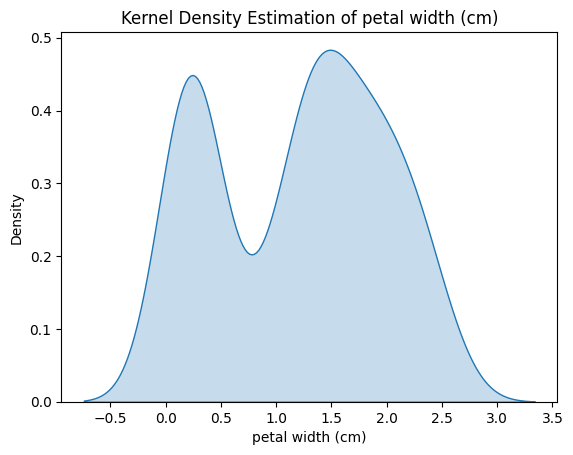

In [124]:
for feature in df.columns[:-2]:
   sns.kdeplot(data=df, x=feature, fill=True)
   plt.xlabel(feature)
   plt.ylabel('Density')
   plt.title(f'Kernel Density Estimation of {feature}')
   plt.show()

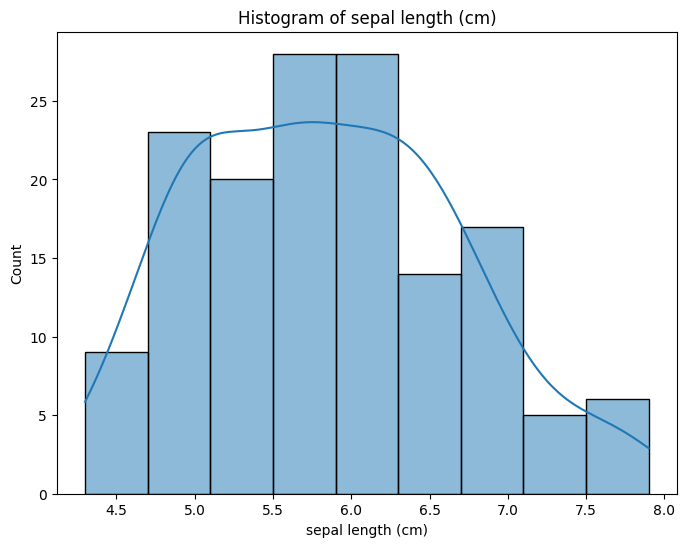

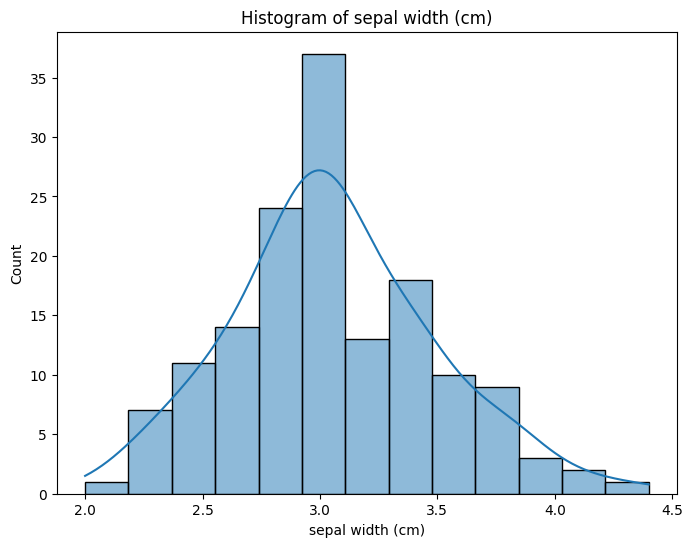

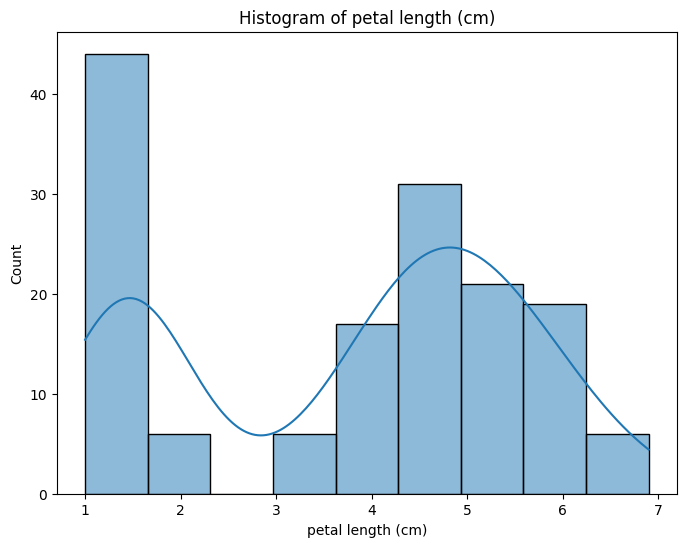

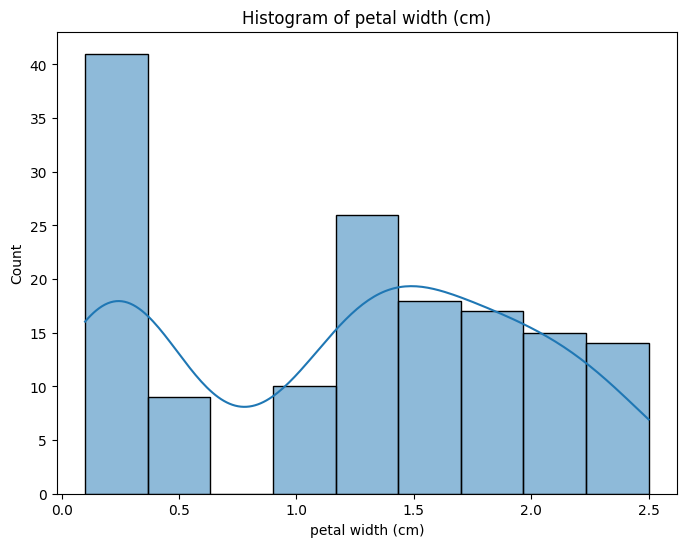

In [125]:
for feature in df.columns[:-2]:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=feature, kde=True)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Histogram of {feature}')
    plt.show()

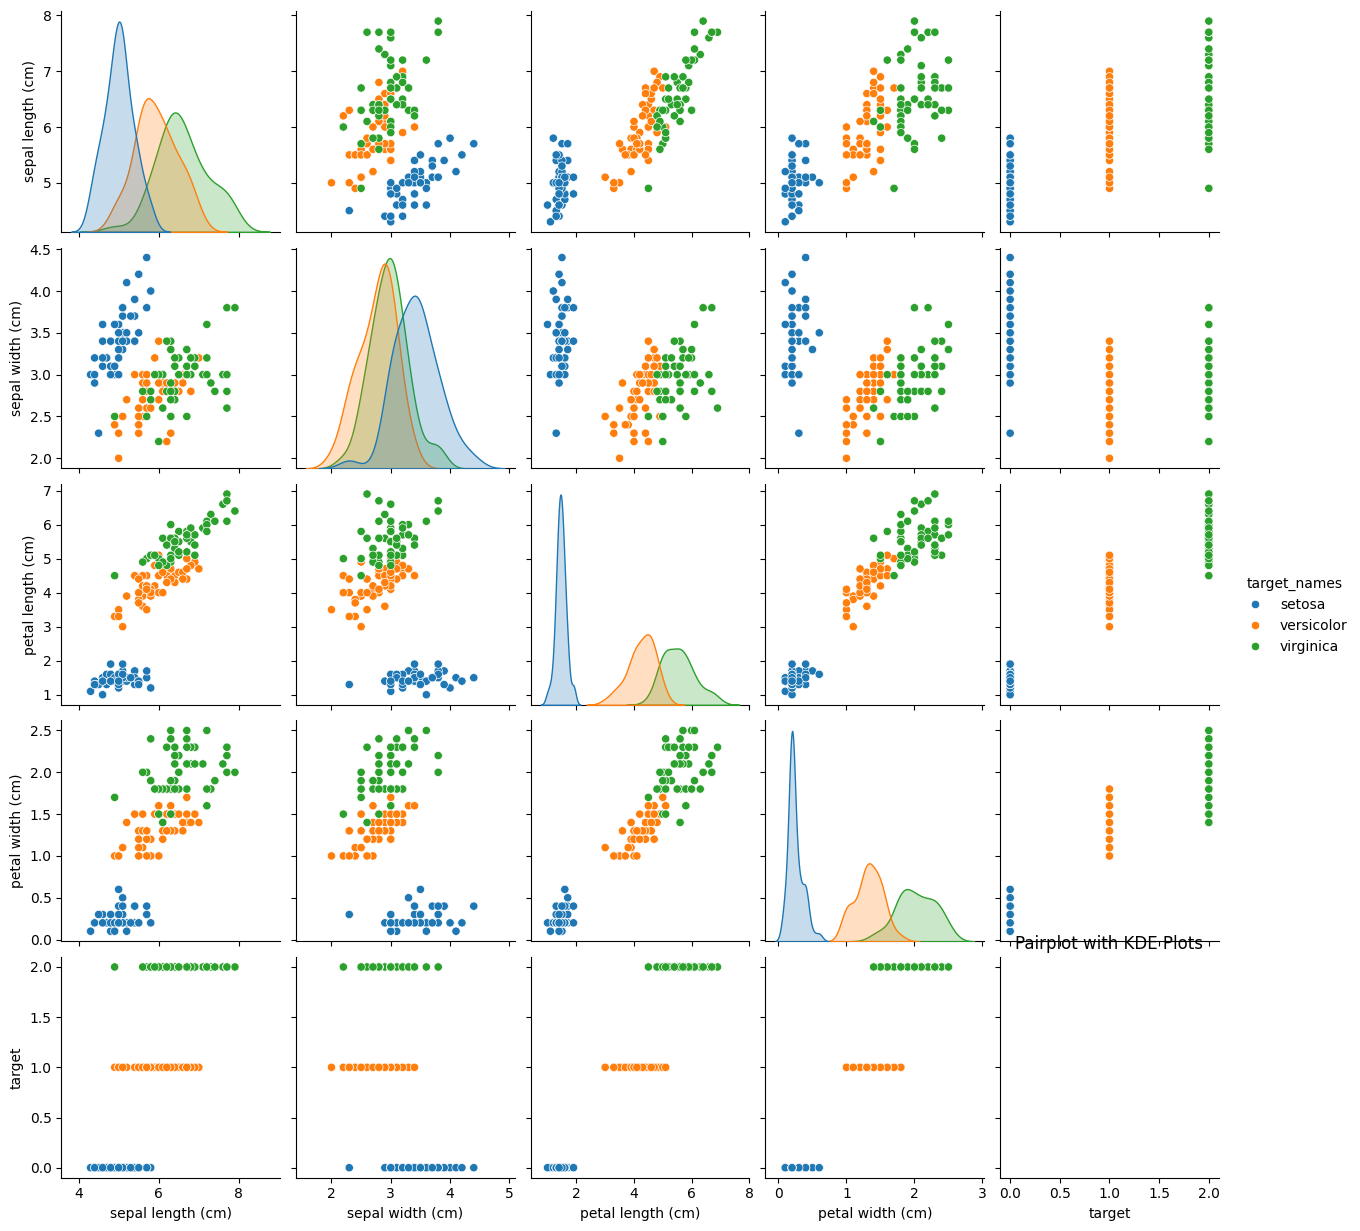

In [126]:
sns.pairplot(data=df, hue='target_names', diag_kind='kde')
plt.title('Pairplot with KDE Plots')
plt.show()

# Get features

In [127]:
features = df.drop(columns=["target",'target_names'],axis=1)# features

In [128]:
features

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# Scaling

In [129]:
scaler = StandardScaler()

# Scale the numerical columns
scaled_features = scaler.fit_transform(features)
scaled_features

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

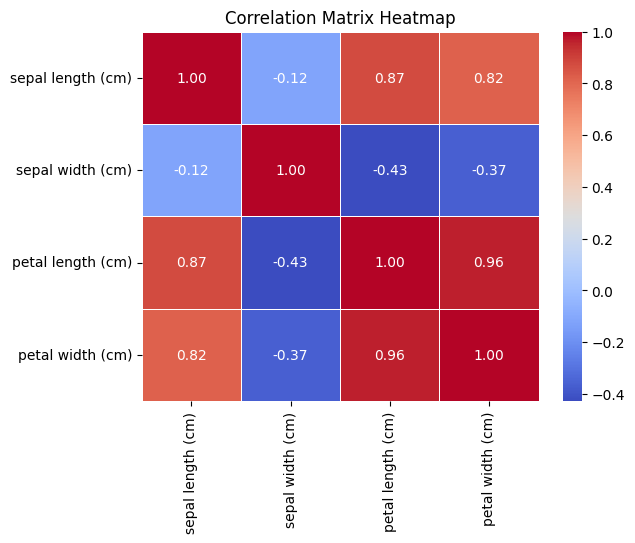

In [130]:
correlation_matrix = features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

# Elbow method

**Using the elbow method to determine the optimal number of clusters for k-means clustering**

In [131]:
inertia=[]
k_value=range(1,8)
for k in k_value:
  kmeans=KMeans(n_clusters=k)
  kmeans.fit(scaled_features)
  inertia.append(kmeans.inertia_)

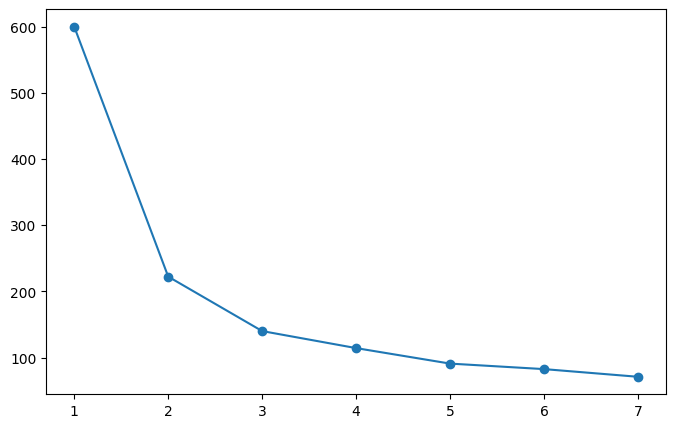

In [132]:
plt.figure(figsize=(8,5))
plt.plot(k_value, inertia, marker='o')
plt.grid=True
plt.show()

# KMeans


K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

How KMeans Clustering Works
KMeans clustering is an unsupervised machine learning algorithm used to group a set of data points into distinct clusters based on their similarities.



*   Initialization: The algorithm starts by randomly selecting K centroids, where K is the number of clusters desired.
*   Assignment Step: Each data point is assigned to the nearest centroid, forming clusters.
Update Step: The centroids are recalculated as the mean of all data points in each cluster.
*   Repeat: The assignment and update steps are repeated until the centroids no longer change or a maximum number of iterations is reached.










**Why KMeans Clustering is Suitable for the Iris Dataset**
The Iris dataset contains 150 samples of flowers, categorized into three species: setosa, versicolor, and virginica, based on four features (sepal length, sepal width, petal length, and petal width). KMeans clustering is suitable for this dataset because:



*   Natural Grouping: The Iris dataset contains inherent clusters (species of flowers), and KMeans aims to partition data into groups based on similarity, making it ideal for identifying these clusters.
*   Feature Space: The dataset has multiple numeric features, which KMeans uses effectively to calculate distances (typically Euclidean distance) and form clusters.
*   Dimensionality: With only four features, the dataset is relatively low-dimensional, making KMeans computationally efficient.
*   Three Classes: Since the number of species is known to be three, we can set K=3 for the KMeans algorithm, which aligns with the actual number of clusters in the data.

In [133]:
kmeans=KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(scaled_features)

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

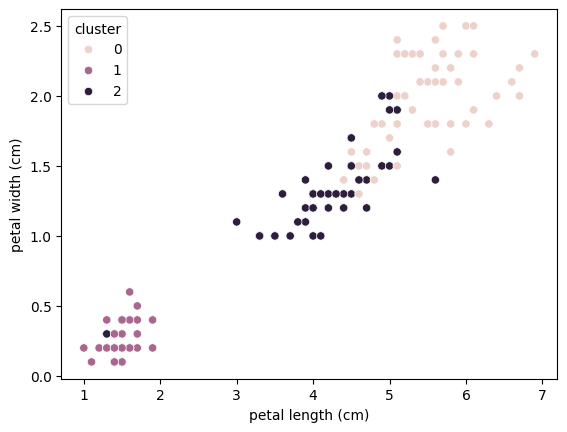

In [134]:
sns.scatterplot(data=df,x='petal length (cm)',y='petal width (cm)',hue='cluster')

In [135]:
df[['target','cluster']]

,target,cluster
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
145,2,0
146,2,2
147,2,0
148,2,0


# Hierarchical Cluster

**Hierarchical clustering** is an unsupervised machine learning algorithm that builds a hierarchy of clusters either by:



*   Agglomerative Approach (Bottom-up):
Each data point starts as its own cluster.
Pairs of clusters are merged step by step based on some distance metric (e.g., Euclidean distance) until all data points are grouped into a single cluster or the desired number of clusters is reached.
*   Divisive Approach (Top-down):
All data points start in a single cluster.
The cluster is recursively split into smaller clusters until each data point forms its own cluster or a desired cluster count is reached.
A dendrogram is often used to visualize the hierarchy, showing how clusters merge or split at different distance levels.

**Why Hierarchical Clustering is Suitable for the Iris Dataset**

* Flexible Cluster Formation: Hierarchical clustering does not require the user to predefine the number of clusters (unlike KMeans). The Iris dataset might exhibit a nested or hierarchical structure among the species, and hierarchical clustering can reveal this.
* Visual Insight via Dendrogram: A dendrogram can give insights into how different species of flowers are related in terms of their feature similarities, showing potential subclusters within species.
* Small Dataset: The Iris dataset contains only 150 samples, making it computationally feasible to perform hierarchical clustering. Hierarchical clustering can be computationally expensive for large datasets, but this is not a concern with Iris.
* Natural Clustering: Similar to KMeans, the Iris dataset has natural clusters corresponding to the species of flowers. Hierarchical clustering can help detect these groupings without prior knowledge of the number of species.











In [136]:
scaler = StandardScaler()

# Scale the numerical columns
scaled_features = scaler.fit_transform(features)
scaled_features

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [137]:
aggclust=AgglomerativeClustering(n_clusters=3,linkage='ward')
df['cluster']=aggclust.fit_predict(scaled_features)

In [138]:
df[['target','cluster']]

,target,cluster
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
145,2,0
146,2,0
147,2,0
148,2,0


In [139]:
# Perform hierarchical clustering
Z = linkage(scaled_features, method='ward')

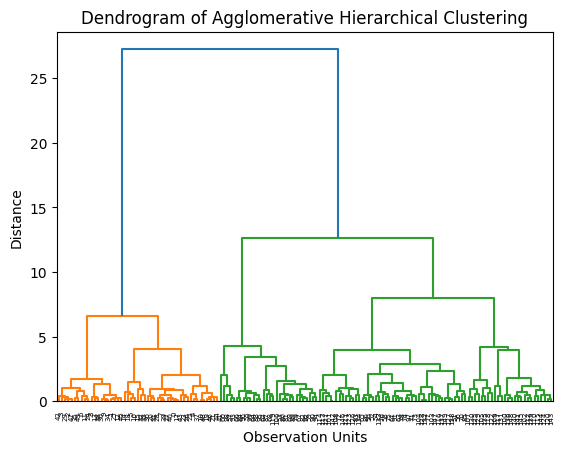

In [140]:
# Plot the dendrogram

dendrogram(Z,leaf_rotation=90)
plt.title('Dendrogram of Agglomerative Hierarchical Clustering')
plt.xlabel("Observation Units")
plt.ylabel('Distance')
plt.show()

**We looked at the hierarchy of clusters with the dendogram, we see that we can choose the optimum number of clusters ideally 3.**